# Load Data

In [1]:
import pandas as pd
import numpy as np

datavacc = pd.read_csv("dataset-isiberita.csv", sep=";", encoding="latin-1")
# melihat data
datavacc
# melihat jumlah baris dan kolom
# datavacc.shape

,isi berita,tanggal,Kategori Sumber,link,label
0,Beredar kabar di Facebook bahwa MUI sudah mela...,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,Telah beredar pesan berantai di WhatsApp yang ...,07-Oct-20,pesan whatsapp,-,1
2,Hasil Periksa Fakta Khairunnisa Andini (Univer...,19-Oct-20,Facebook,https://archive.vn/cEu8t,1
3,Penjelasan : Beredar narasi di sosial media kl...,03-Nov-20,Kominfo,https://www.liputan6.com/news/read/4389620/sat...,1
4,Penjelasan : Beredar di media sosial sebuah po...,03-Nov-20,Kominfo,https://www.kominfo.go.id/content/detail/30566...,1
...,...,...,...,...,...
1448,JAKARTA - Indonesia akan memulai program vaksi...,11 Januari 2022,Website Covid19.co.id,https://covid19.go.id/artikel/2022/01/11/vaksi...,0
1449,JAKARTA - Sejauh ini ada yang sudah lolos uji ...,26 Agustus 2021,Website Covid19.co.id,https://covid19.go.id/artikel/2021/08/26/mixin...,0
1450,JAKARTA - Satgas Penanganan COVID-19 meminta m...,23-Dec-21,Website Covid19.co.id,https://covid19.go.id/artikel/2021/12/23/satga...,0
1451,IDI melihat bahwa program vaksinasi adalah sal...,15-Dec-20,Website Covid19.co.id,https://covid19.go.id/artikel/2020/12/15/idi-o...,0


In [2]:
datavacc.shape

(1453, 5)

In [3]:
datavacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   isi berita       1453 non-null   object
 1   tanggal          1453 non-null   object
 2   Kategori Sumber  1453 non-null   object
 3   link             1453 non-null   object
 4   label            1453 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 56.9+ KB


In [4]:
display("Data ",datavacc.describe())

'Data '

,label
count,1453.000000
mean,0.306951
std,0.461388
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Cek Missing Values

In [5]:
# mengecek data nan
def null_table(datavacc):
#     print("Test Data Frame")
    print(pd.isnull(datavacc).sum())

null_table(datavacc)

isi berita         0
tanggal            0
Kategori Sumber    0
link               0
label              0
dtype: int64


Check Duplicate

In [6]:
print("Data :",datavacc.duplicated().sum())

Data : 2


In [7]:
datavacc.drop_duplicates(keep = False, inplace = True)

In [8]:
print("Data :",datavacc.duplicated().sum())

Data : 0


# Analisis Deskriptif

In [9]:
# melihat banyak nya jumlah judul berita HOAX = 1 dan berita SALAH = 0
datavacc['label'].value_counts()

0    1007
1     442
Name: label, dtype: int64

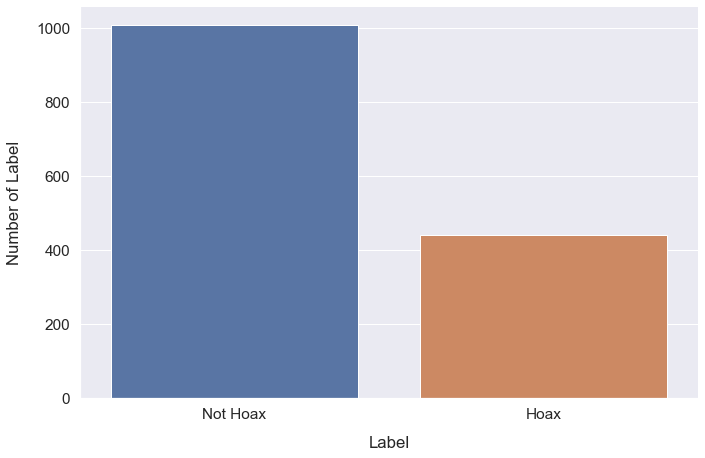

In [10]:
import matplotlib.pyplot as plt
# _, ax1 = plt.subplots(figsize=(6,5))
# stars_histogram = datavacc['label'].value_counts().sort_index()
# stars_histogram.plot(kind='bar', width=0.7, color='cyan')
# plt.xlabel('label')
# plt.ylabel('jumlah judul')

# plt.tight_layout()
# plt.show

import seaborn as sns
sns.set(font_scale=1.4)
g = sns.catplot(x='label', kind='count', data=datavacc, height=6.27, aspect=9.7/6.27)
g.set_xticklabels(['Not Hoax', 'Hoax'])
plt.xlabel("Label", labelpad=14)
plt.ylabel("Number of Label", labelpad=14)
plt.show()

Preprocessing (Mengubah dataset agar dapat diolah pada algoritam ML)

In [11]:
# menghapus baris jika ada data kosong
datavacc= datavacc.dropna()
datavacc.shape

(1449, 5)

Case Folding

In [12]:
# Mengubah semua huruf kapital menjadi huruf kecil atau lower text

datavacc['isi berita'] = datavacc['isi berita'].str.lower()
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,beredar kabar di facebook bahwa mui sudah mela...,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,telah beredar pesan berantai di whatsapp yang ...,07-Oct-20,pesan whatsapp,-,1


In [13]:
datavacc.to_csv("CaseFolding-isiberita.csv", index=False)

Cleansing 

In [14]:
# pembersihan text dari tab, new line, back slice, mention, link, hastag dan URL

import string
# regex library
import re 

def clean_text(text):
    # menghapus newline, tab dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    # menghapus non ASCII (emoticon, chiness word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\s+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("htpp://", " ").replace("htpps://"," ")

datavacc['isi berita'] = datavacc['isi berita'].apply(clean_text)
datavacc.head(5)

,isi berita,tanggal,Kategori Sumber,link,label
0,beredar kabar di facebook bahwa mui sudah mela...,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,telah beredar pesan berantai di whatsapp yang ...,07-Oct-20,pesan whatsapp,-,1
2,hasil periksa fakta khairunnisa andini (univer...,19-Oct-20,Facebook,https://archive.vn/cEu8t,1
3,penjelasan : beredar narasi di sosial media kl...,03-Nov-20,Kominfo,https://www.liputan6.com/news/read/4389620/sat...,1
4,penjelasan : beredar di media sosial sebuah po...,03-Nov-20,Kominfo,https://www.kominfo.go.id/content/detail/30566...,1


In [15]:
datavacc.to_csv("Cleansing-isiberita.csv", index=False)

In [14]:
# Remove Number

def remove_number(text):
    return re.sub(r"\d+", "", text)

datavacc['isi berita'] = datavacc['isi berita'].apply(remove_number)
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,beredar kabar di facebook bahwa mui sudah mela...,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,telah beredar pesan berantai di whatsapp yang ...,07-Oct-20,pesan whatsapp,-,1


In [16]:
datavacc.to_csv("RemoveNumber-isiberita.csv", index=False)

In [17]:
# Remove Punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","", string.punctuation))

datavacc['isi berita'] = datavacc['isi berita'].apply(remove_punctuation)
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,beredar kabar di facebook bahwa mui sudah mela...,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,telah beredar pesan berantai di whatsapp yang ...,07-Oct-20,pesan whatsapp,-,1


In [18]:
datavacc.to_csv("RemovePunctuation-isiberita.csv", index=False)

In [19]:
# Remove Single Char

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b","", text)

datavacc['isi berita'] = datavacc['isi berita'].apply(remove_single_char)
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,beredar kabar di facebook bahwa mui sudah mela...,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,telah beredar pesan berantai di whatsapp yang ...,07-Oct-20,pesan whatsapp,-,1


In [20]:
datavacc.to_csv("SingleChar-isiberita.csv", index=False)

Tokenizing

In [21]:
#pemisahan teks menjadi potongan kata
 
from nltk.tokenize import word_tokenize
import nltk

# NLTK word token
def tokenz(text):
    token = nltk.word_tokenize(text)
    return token

datavacc['isi berita'] = datavacc['isi berita'].apply(tokenz) 
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,"[beredar, kabar, di, facebook, bahwa, mui, sud...",07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,"[telah, beredar, pesan, berantai, di, whatsapp...",07-Oct-20,pesan whatsapp,-,1


In [22]:
datavacc.to_csv("Tokenizing-isiberita.csv", index=False)

Spell Normalization

In [23]:
# penyeragaman kata yang memiliki makna yang sama namun penulisan yang berbeda

normalizad_word = pd.read_excel("normalisasi.xlsx")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(doc):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in doc]

datavacc['isi berita'] = datavacc['isi berita'].apply(normalized_term) 
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,"[beredar, kabar, di, facebook, bahwa, mui, sud...",07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,"[telah, beredar, pesan, berantai, di, whatsapp...",07-Oct-20,pesan whatsapp,-,1


In [24]:
datavacc.to_csv("Normalisasi-isiberita.csv", index=False)

Stopword Removal

In [25]:
from nltk.corpus import stopwords


#get stopword indonesia
list_stopwords = stopwords.words('indonesian')
# read data stopword tambahan from csv
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# konversi kata stopword dari file csv ke list
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# mengakhiri list ke dictionary
list_stopwords = set(list_stopwords)

# fungsi untuk menghapus stopword
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

datavacc['isi berita'] = datavacc['isi berita'].apply(stopwords_removal) 
datavacc.head(2)

,isi berita,tanggal,Kategori Sumber,link,label
0,"[beredar, kabar, facebook, mui, melarang, peng...",07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,"[beredar, pesan, berantai, whatsapp, berisi, n...",07-Oct-20,pesan whatsapp,-,1


In [26]:
datavacc.to_csv("StopwordRemoval-isiberita.csv", index=False)

Stemming

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in datavacc['isi berita']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

datavacc['isi berita'] = datavacc['isi berita'].swifter.apply(get_stemmed_term)

16652
------------------------
beredar : edar
kabar : kabar
facebook : facebook
mui : mui
melarang : larang
penggunaan : guna
vaksin : vaksin
covid19 : covid19
tiongkok : tiongkok
hoaks : hoaks
faktanya : fakta
klaim : klaim
salah : salah
sekjen : sekjen
anwar : anwar
abbas : abbas
3 : 3
oktober : oktober
2020 : 2020
membahas : bahas
tahap : tahap
uji : uji
klinis : klinis
keluarkan : keluar
fatwa : fatwa
putusan : putus
apapun : apa
terkaitnya : kait
pesan : pesan
berantai : beranta
whatsapp : whatsapp
berisi : isi
narasi : narasi
menteri : menteri
agama : agama
fachrul : fachrul
razi : razi
dikabarkan : kabar
positif : positif
isi : isi
gawaaaaat : gawaaaaat
yaaa : yaaa
waspada : waspada
jgn : jgn
paksin : paksin
mentri : tri
kena : kena
kovid : kovid
haya : haya
hoox : hoox
biar : biar
rakyat : rakyat
waspadalah : waspada
dilansir : lansir
laman : laman
situsmedcomid : situsmedcomid
beliau : beliau
dinyatakan : nyata
menjalani : jalan
tes : tes
swab : swab
17 : 17
september : septem

Pandas Apply: 100%|██████████| 1449/1449 [00:00<00:00, 10048.89it/s]


In [28]:
datavacc.to_csv("Stemming-isiberita.csv", index=False)

RANDOM FOREST

In [21]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import gensim
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [22]:
list_accuracy, list_precision, list_recall, list_f1 = [], [], [], []

In [23]:
#split data use ratio 80:20

for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

    # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['isi berita'], vector_size=100, window=5, min_count=2) 

    # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['isi berita']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['isi berita']]), dtype='object')


    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))

    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # grid parameters for random forest
    parameters = {
        'n_estimators' : [50, 75, 100], 
        'min_samples_leaf' : [1, 2, 4],
        'min_samples_split' : [2, 5, 10]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_rf = RandomForestClassifier(random_state=49)
    clf = GridSearchCV(model_rf,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clf.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Best Accuracy :",clf.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification RF
    y_pred_rf = clf.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_rf) 
    recall = recall_score(y_test, y_pred_rf) 
    accuracy = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy.append(accuracy)
    list_precision.append(presisi)
    list_recall.append(recall)
    list_f1.append(f1)

1159 290
Counter({0: 800, 1: 800})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy : 0.95
Precision Test: 0.8721 / Recall Test: 0.9036 / Accuracy Test: 0.9345 / F1 Test: 0.8876
1159 290
Counter({1: 802, 0: 802})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy : 0.9576285046728972
Precision Test: 0.9176 / Recall Test: 0.9176 / Accuracy Test: 0.9517 / F1 Test: 0.9176
1159 290
Counter({0: 812, 1: 812})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy : 0.9593846153846155
Precision Test: 0.8913 / Recall Test: 0.8632 / Accuracy Test: 0.9207 / F1 Test: 0.877
1159 290
Counter({0: 809, 1: 809})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Best Accuracy : 0.9555288002140427
Precision Test: 0.9043 / Recall Test: 0.9239 / Accuracy Test: 0.9448 / F1 Test: 0.914
1159 290
Counter(

In [24]:
print(list_accuracy, np.mean(list_accuracy)) 
print(list_precision, np.mean(list_precision))
print(list_recall, np.mean(list_recall))
print(list_f1, np.mean(list_f1))

[0.9344827586206896, 0.9517241379310345, 0.9206896551724137, 0.9448275862068966, 0.9275862068965517] 0.9358620689655173
[0.872093023255814, 0.9176470588235294, 0.8913043478260869, 0.9042553191489362, 0.8541666666666666] 0.8878932831442066
[0.9036144578313253, 0.9176470588235294, 0.8631578947368421, 0.9239130434782609, 0.9213483146067416] 0.9059361538953399
[0.8875739644970415, 0.9176470588235294, 0.8770053475935828, 0.9139784946236559, 0.8864864864864865] 0.8965382704048592


Adaboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [26]:
list_accuracy_Adb, list_precision_Adb, list_recall_Adb, list_f1_Adb = [], [], [], []

In [27]:
for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

     # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['isi berita'], vector_size=100, window=5, min_count=2)

   # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['isi berita']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['isi berita']]), dtype='object')

    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))


    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # parameter grid for Adaboost
    parameters = {
        'n_estimators' : [100, 150],
        'learning_rate' : [0.5, 0.01, 0.2, 0.3, 0.4]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_adaboost = AdaBoostClassifier(random_state=49)
    clfdaboost = GridSearchCV(model_adaboost,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clfdaboost.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters adaboost:", clfdaboost.best_params_)
    print("Best Accuracy adaboost :",clfdaboost.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification Adaboost

    y_pred_adb = clfdaboost.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_adb) 
    recall = recall_score(y_test, y_pred_adb) 
    accuracy = accuracy_score(y_test, y_pred_adb)
    f1 = f1_score(y_test, y_pred_adb)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy_Adb.append(accuracy)
    list_precision_Adb.append(presisi)
    list_recall_Adb.append(recall)
    list_f1_Adb.append(f1)

1159 290
Counter({1: 805, 0: 805})
Tuned Hyperparameters adaboost: {'learning_rate': 0.3, 'n_estimators': 150}
Best Accuracy adaboost : 0.9652173913043478
Precision Test: 0.802 / Recall Test: 0.9205 / Accuracy Test: 0.9069 / F1 Test: 0.8571
1159 290
Counter({1: 801, 0: 801})
Tuned Hyperparameters adaboost: {'learning_rate': 0.2, 'n_estimators': 100}
Best Accuracy adaboost : 0.9556970404984424
Precision Test: 0.8316 / Recall Test: 0.9405 / Accuracy Test: 0.9276 / F1 Test: 0.8827
1159 290
Counter({0: 794, 1: 794})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.9572069122869671
Precision Test: 0.7826 / Recall Test: 0.9351 / Accuracy Test: 0.9138 / F1 Test: 0.8521
1159 290
Counter({0: 808, 1: 808})
Tuned Hyperparameters adaboost: {'learning_rate': 0.4, 'n_estimators': 150}
Best Accuracy adaboost : 0.9560734625234109
Precision Test: 0.8602 / Recall Test: 0.8791 / Accuracy Test: 0.9172 / F1 Test: 0.8696
1159 290
Counter({0: 806, 1: 806}

In [28]:
print(list_accuracy_Adb, np.mean(list_accuracy_Adb))
print(list_precision_Adb, np.mean(list_precision_Adb))
print(list_recall_Adb, np.mean(list_recall_Adb))
print(list_f1_Adb, np.mean(list_f1_Adb))

[0.906896551724138, 0.9275862068965517, 0.9137931034482759, 0.9172413793103448, 0.9172413793103448] 0.9165517241379311
[0.801980198019802, 0.8315789473684211, 0.782608695652174, 0.8602150537634409, 0.8217821782178217] 0.8196330146043319
[0.9204545454545454, 0.9404761904761905, 0.935064935064935, 0.8791208791208791, 0.9325842696629213] 0.9215401639558942
[0.8571428571428572, 0.88268156424581, 0.8520710059171598, 0.8695652173913043, 0.8736842105263158] 0.8670289710446895
